In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
## Adding a button to hide the Python source code
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the Python code."></form>''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

# Chapter 5 - Summary

## 5.1 Bayesian inference - Part 2

### 5.1.1 Combining results

The joint probability of two independent events is equal to the product of their probabilities. Can be done analytically if the MAP (or MLE) can be written in a closed form, but often requires to be evaluated numerically (at multiple points of the distribution).

### 5.1.2 On the use of priors

An alternative way of combining results is to use the posterior probability distribution of one 'experiment' as the prior probability for the second experiment. They are mathematically interchangeable operations.<br><br>

##### Recall
The prior probability function should always be normalised. We have seen 'flat priors' (i.e. constant within a range) and 'improper priors' (i.e. not possible to normalise).

## 5.2 Least square

### 5.2.1 Least square derivation

In the previous chapter we have investigated the maximum a posteriori and maximum likelihood for general distributions. We will now focus on a particular case, that of a Gaussian likelihood distribution, as it is one of the most useful of all.

Consider two quantities, $(x_i,y_i)$, which are respectively the independent and dependent variables related to a certain measurement. A precision $\sigma_i$ denotes the Gaussian deviation of $y_i$ with respect to the true value, which can be mapped from $x$ using a function, $f(x;\theta)$, that depends on some unknown parameters, $\theta$. We can write the likelihood probability of having the observed quantity $y_i$ as:

\begin{equation}
  \mathcal{L}(y_i \mid f(\theta), \theta, x_i, \sigma_i) = \frac{1}{\sqrt{2\pi} \sigma_i} \exp{\left(-\frac{\left( y_i - f(x_i;\theta) \right)^2}{2\sigma_i^2}\right)}
\end{equation}

If we assume flat priors (i.e. all parameters are equally probable), then the posterior probability of the unknown parameters $\theta$ for $N$ such samples is:

\begin{eqnarray}
  P(\theta \mid f(\theta), y, x, \sigma) &=& \frac{I \mathcal{L}(y \mid \theta)}{E} \\
    &=& \frac{I}{E} \prod_i^N \frac{1}{\sqrt{2\pi} \sigma_i} \exp{\left(-\frac{\left( y_i - f(x_i;\theta) \right)^2}{2\sigma_i^2}\right)} \,.
\end{eqnarray}

Taking the logarithm of the posterior:

\begin{equation}
  \ln P(\theta \mid f, y, x, \sigma) = \ln I - \frac{N}{2} \ln{(2\pi)} - \sum_i^N \ln \sigma_i - \frac{1}{2} \sum_i^N \frac{\left( y_i - f(x_i;\theta) \right)^2}{\sigma_i^2} - \ln E \,.
\end{equation}

Because of the flat priors, we know that the MAP $\equiv$ MLE. Also, since only the last summation term depends on $\theta$ we can drop all additive and constant terms. In which case:

\begin{equation}
  \max \left[ \ln P(\theta \mid f, x_i, \sigma_i) \right] = \max \left[ -\frac{1}{2} \sum_i^N \frac{\left( y_i - f(x_i;\theta) \right)^2}{\sigma_i^2} \right] \,.
\end{equation}

Finally, we can recognise that maximizing this function is equivalent to minimizing:

\begin{equation}
  \chi^2(\theta) = \sum_i^N \frac{\left( y_i - f(x_i;\theta) \right)^2}{\sigma_i^2} \,.
\end{equation}

We call this expression the **chi-squared**, and the procedure is recognised as the **method of least squares**. It is a very universal result: thanks to the central limit theorem the probability of having some experimental data given a model will tend to be distributed as a Gaussian.

In the case where errors are correlated, we can use a more general expression for the chi-squared:

\begin{equation}
  \chi^2(\theta) = \sum_i^N \sum_j^N \left( y_i - f(x_i;\theta) \right) \left( V^{-1}_{i,j} \right) \left( y_j - f(x_j;\theta) \right) \,,
\end{equation}
where $V_{i,j}$ is the covariance matrix of the data. Note the summation indices here. If we use matrix notation, we can rewrite this expression as:

\begin{equation}
  \chi^2(\theta) = \left( \underline{y} - \underline{f} \right)^T \underline{\underline{V}}^{-1} \left( \underline{y} - \underline{f} \right) \,,
\end{equation}

For the chi-squared, the minimum variance bound can be written:

\begin{eqnarray}
  \sigma^2_\widehat{\theta} &\equiv& \left[ \left( -\frac{\partial^2 \ln \mathcal{L}}{\partial \theta^2} \right)^{-1} \right]_\widehat{\theta} \\
  &=& \left[ \left( \frac{1}{2} \frac{\partial^2 \chi^2}{\partial \theta^2} \right)^{-1} \right]_\widehat{\theta} \,.
\end{eqnarray}


### 5.2.2 Linear least squares

A particularly interesting family of models in the context of least squares are those which are linear functions of the $M$ parameters $\theta_j$:

\begin{equation}
  f(x_i; \theta) = \sum_j^M A_j(x_i) \theta_j \,,
\end{equation}

or

\begin{equation}
  \underline{f}(\underline{x}; \underline{\theta}) = \underline{\underline{A}} \, \underline{\theta} \,,
\end{equation}
with the second expression being the matrix notation.

The linearity is required in the parameters $\theta_j$ but $A_j$ could be any function of $x$. It is also worth knowing that linear least square estimators can be shown to have zero bias and minimum variance, thus making them actual 'good' estimators.

<div class="example">Example 1: $f(x; m) = mx$ with constant uncertainties</div>

Let us first consider one of the simplest case scenario, a simple proportion $f(x; m) = m x$ in which all measurement errors are the same. We can write the chi-squared as:

\begin{equation}
  \chi^2 = \sum_i^N \frac{(y_i - m x_i)^2}{\sigma^2}
\end{equation}

Differentiating with respect to $m$ gives

\begin{equation}
  \frac{\partial \chi^2}{\partial m} = \sum_i^N \left[ -2 x_i \frac{(y_i - m x_i)}{\sigma^2} \right]
\end{equation}

The MLE estimator can therefore be found:

\begin{eqnarray}
  \sum_i^N (x_i y_i - \widehat{m} x_i^2) = 0 \\
  \sum_i^N x_i y_i = \widehat{m} \sum_i^N x_i^2 \,.
\end{eqnarray}

Dividing by $N$ on both side to obtain averages yield:

\begin{equation}
  \widehat{m} = \frac{\langle xy \rangle}{\langle x^2 \rangle}
\end{equation}

The variance is found from the inverse of the MVB:

\begin{eqnarray}
  \sigma^2_{\widehat{m}} &=& \left( \frac{1}{2} \frac{\partial^2 \chi^2}{\partial m^2} \right)^{-1} \\
  &=& \left( \frac{\sum_i^N x_i^2}{\sigma^2} \right)^{-1} \\
  &=& \frac{\sigma^2}{N \langle x^2 \rangle} \,.
\end{eqnarray}

#### Matrix formulation of linear least squares

In general the linear least squares involves solving $M$ equations for the $M$ individual $\theta$ parameters with $N$ observed data points. Recalling the chi-squared definition:

\begin{equation}
  \chi^2(\theta) = \sum_i^N \frac{\left( y_i - \sum_j^M A_j(x_i) \theta_j) \right)^2}{\sigma_i^2} \,.
\end{equation}

Differentiating with respect to $\theta_j$ and setting to zero:

\begin{equation}
  \sum_i^N A_j(x_i) \frac{\left( y_i - \sum_j^M A_j(x) \theta_j) \right)}{\sigma_i^2} = 0 \,.
\end{equation}

This system of $M$ equations above are called the _'normal equations'_.

If we write the chi-squared derivative in terms of matrix formulation, with $\sigma_i^2$ generalising to the covariance matrix of the uncertainties, $V_{ij}$:

\begin{equation}
  \underline{\underline{A}}^T \underline{\underline{V}}^{-1} \underline{\underline{A}} \widehat{\underline{\theta}} - \underline{\underline{A}}^T \underline{\underline{V}}^{-1} \underline{y} = 0 \,.
\end{equation}

Solving for $\widehat{\underline{\theta}}$:

\begin{equation}
  \widehat{\underline{\theta}} = (\underline{\underline{A}}^T \underline{\underline{V}}^{-1} \underline{\underline{A}})^{-1} \underline{\underline{A}}^T \underline{\underline{V}}^{-1} \underline{y} \,.
\end{equation}

And similarly the covariance matrix of the best-fit parameters $\widehat{\underline{\theta}}$ can be written as:

\begin{equation}
  \underline{\underline{\Sigma}}_\widehat{\underline{\theta}} = \left( \underline{\underline{A}}^T \underline{\underline{V}}^{-1} \underline{\underline{A}} \right)^{-1} \,.
\end{equation}

### 5.2.3 Chi-square distribution

We have defined the chi-squared earlier as a quantity but did not elaborate further on its meaning. It is in fact a statistical probability distribution which corresponds to the sum of the squares of $k$ independent standard normal random variables (i.e. having $\mu = 0$ and $\sigma = 1$). The PDF is given by:

\begin{equation}
  \chi^2_k \equiv f(x;\,k) =
  \begin{cases}
    \dfrac{x^{\frac k 2 -1} e^{-\frac x 2}}{2^{\frac k 2} \Gamma\left(\frac k 2 \right)},  & x > 0; \\ 0, & \text{otherwise}.
  \end{cases}
\end{equation}

We refer to $k$ as the numbers of degrees of freedom, also known as _dof_. For a data sample containing $N$ independent point $k = N - M$, where $M$ is the number of parameters in the model (which reduce the number of degrees of freedom).

The mean of a $\chi^2_k$ is $k$ and its variance is $2k$.

Thanks to the Central Limit Theorem, at large $k$ ($\approx 30$), the chi-squared distribution becomes very close to a Gaussian.

Another relevant property of the chi-squared distribution is that the sum of two independent chi-squared, $\chi^2_{k_1}$ and $\chi^2_{k_2}$, is also chi-squared distributed with $k_1 + k_2$ degrees of freedom, $\chi^2_{k_1+k_2}$. When multiplying likelihoods to combine data, or adding the log-likelihood, we add the chi-squared and the result preserves its chi-squared property. We will see more about chi-squared in the chapter on the goodness of fit tests.

Below is a view of the distribution for different numbers of degrees of freedom.

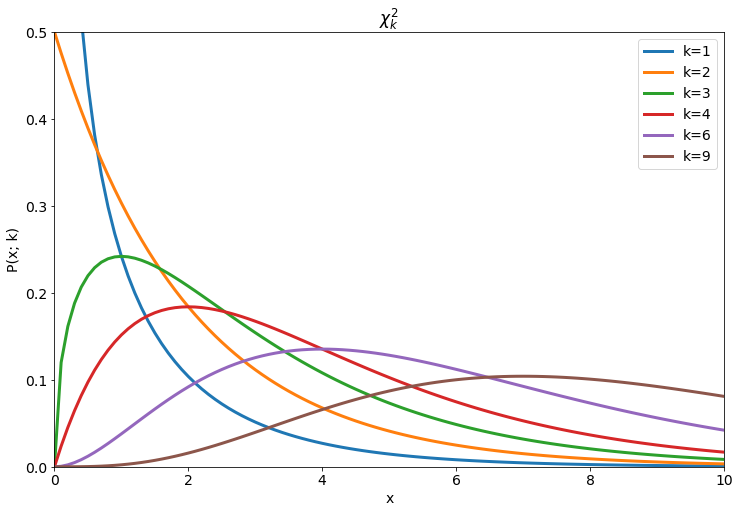

In [4]:
## Displaying the chi2 distribution for different numbers of freedom
x = np.linspace(0,10,101)
dof = [1,2,3,4,6,9]

fig, ax = plt.subplots(figsize=(12,8))
for dof_ in dof:
    chi2 = scipy.stats.chi2.pdf(x, dof_)
    ax.plot(x, chi2, linewidth=3, label='k={}'.format(dof_))

ax.legend()
ax.set_title('$\chi^2_k$')
ax.set_xlabel('x')
ax.set_ylabel('P(x; k)')
ax.set_xlim(0, 10)
ax.set_ylim(0, 0.5);

### 5.2.4 Non-linear least squares

In the case of a model $f(x; \theta)$ which is a non-linear function of $\theta$ (e.g. $e^{\theta x}$, $\sin{(\theta x)}$) there is in general no analytic solution to solve the $M$ equations for each of the parameters in $\theta$. The MLE must be computed numerically.

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>